In [2]:
import random
import numpy as np
from statistics import mean
from random import randrange
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time
import sys
from scipy.spatial import distance
from sklearn import preprocessing
import gc
%matplotlib inline

## Load Data

load both train and test data

In [22]:
train_small = np.genfromtxt(
        'datasets/MNIST_train_small.csv', delimiter=',')
test_small = np.genfromtxt('datasets/MNIST_test_small.csv', delimiter=',')

In [23]:
X_train_small, y_train_small, X_test_small, y_test_small = train_small[:,1:], train_small[:,0], test_small[:,1:], test_small[:,0]

## K-Nearest Neighbor

In [58]:
class KNearestNeighbors():
    """ K-nearest neighbour aka KNN classifier
    
    Parameters
    -------------
    k : int classes
    p : int parameter p in Minkowski Distance calculation
    
    Attributes
    -------------
    
    """
    
    # initialize parameters in KNN model
    def __init__(self, k, p=2):
        self.k = k
        self.p = p    
    
    def compute_distance(self, X_test):
        distances=distance.cdist(X_test,self.X_train,'minkowski', p = self.p)
        return distances
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X_test):
        
        #compute distances between 
        distances = self.compute_distance(X_test)
        
        #generate predictions
        y_indices = np.argsort(distances)
        k_closests = self.y_train[y_indices[:,:self.k]].astype(int)
        bincount = np.array([np.count_nonzero(k_closests == j, axis = 1) for j in range(10)]).transpose()
        
        #random selection
        max_bin_values = np.amax(bincount,axis=1)
        a = np.array([bincount[j] == max_bin_values[j] for j in range(max_bin_values.shape[0])])
        y_pred = np.array([])
        for row in a:
            tmp = np.asarray(np.nonzero(row)).reshape(-1)
            y_pred = np.append(y_pred,np.random.choice(tmp,1,replace=False))      
#         y_pred = np.argmax(bincount,axis = 1)            
        
        return y_pred
        

## a. Using Euclidean distance to plot empirical training and test loss as a function of k

In [59]:
k_neighbors = np.linspace(1, 20, 20, dtype='int')

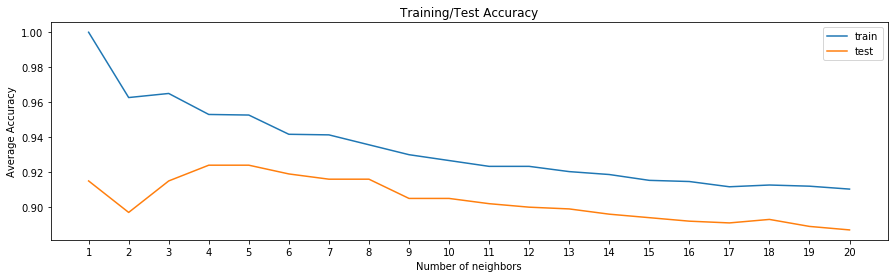

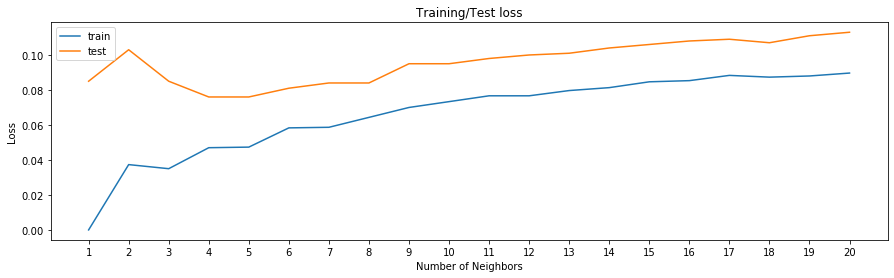

In [70]:
plt.figure(figsize=(15,4))
plt.title("Training/Test Accuracy")
plt.xticks(k_neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("Average Accuracy")
train_acc_results = []
test_acc_results = []
train_loss_results = []
test_loss_results = []
for k in k_neighbors:
    KNN = KNearestNeighbors(k,2)
    KNN.fit(X_train_small,y_train_small)
    y_train_pred = KNN.predict(X_train_small)
    y_test_pred = KNN.predict(X_test_small)
    train_acc = np.sum(y_train_pred == y_train_small)/y_train_small.shape[0]
    test_acc = np.sum(y_test_pred == y_test_small)/y_test_small.shape[0]
    empirical_train_loss = np.sum(y_train_pred!=y_train_small)/y_train_small.shape[0]
    empirical_test_loss = np.sum(y_test_pred!=y_test_small)/y_test_small.shape[0]
    train_loss_results.append(empirical_train_loss)
    test_loss_results.append(empirical_test_loss)
    train_acc_results.append(train_acc)
    test_acc_results.append(test_acc)
    
plt.plot(k_neighbors,train_acc_results,label='train')
plt.plot(k_neighbors,test_acc_results,label='test')
plt.legend()
plt.show()

plt.figure(figsize=(15,4))
plt.title("Training/Test loss")
plt.ylabel("Loss")
plt.xlabel("Number of Neighbors")
plt.xticks(k_neighbors)
plt.plot(k_neighbors,train_loss_results,label='train')
plt.plot(k_neighbors,test_loss_results,label='test')
plt.legend()
plt.show()

## b&c Implement LOOCV to estimate the risk of the k-NN rule for k and p $\in\{1,...,20\}$

In [12]:
def new_new_cross_val_score(X, y, distances, cv=5, k=5, p=2):
    fold_size = int(y.shape[0]/cv)
    indices = np.arange(y.shape[0])
    np.random.RandomState(123).shuffle(indices)
    result = np.array([])
    for i in range(cv):
        validation_idx = indices[i*fold_size:(i+1)*fold_size]
        train_idx = np.concatenate((indices[:i*fold_size], indices[(i+1)*fold_size:]))
        
        y_indices = np.argsort(distances[validation_idx][:,train_idx])
        k_closests = y[train_idx][y_indices[:,:k]].astype(int)
        bincount = np.array([np.count_nonzero(k_closests == j, axis = 1) for j in range(10)]).transpose()
        
        #random selection
        max_bin_values = np.amax(bincount,axis=1)
        a = np.array([bincount[j] == max_bin_values[j] for j in range(max_bin_values.shape[0])])
        y_pred = np.array([])
        for row in a:
            tmp = np.asarray(np.nonzero(row)).reshape(-1)
            y_pred = np.append(y_pred,np.random.choice(tmp,1,replace=False))      
#         y_pred = np.argmax(bincount,axis = 1)
        
        valid_acc = np.sum(y_pred == y[validation_idx])
        result = np.append(result,valid_acc/validation_idx.shape[0])
    
    return result

In [72]:
k_neighbors = np.linspace(1, 20, 20, dtype='int')

In [14]:
distances = distance.pdist(X_train_small, 'minkowski', 2)
distances = distance.squareform(distances)

start validate 1  neighbors

finished, mean accuracy: 0.9193333333333333
start validate 2  neighbors

finished, mean accuracy: 0.9096666666666666
start validate 3  neighbors

finished, mean accuracy: 0.9243333333333333
start validate 4  neighbors

finished, mean accuracy: 0.9193333333333333
start validate 5  neighbors

finished, mean accuracy: 0.9213333333333333
start validate 6  neighbors

finished, mean accuracy: 0.917
start validate 7  neighbors

finished, mean accuracy: 0.9176666666666666
start validate 8  neighbors

finished, mean accuracy: 0.912
start validate 9  neighbors

finished, mean accuracy: 0.9103333333333333
start validate 10  neighbors

finished, mean accuracy: 0.907
start validate 11  neighbors

finished, mean accuracy: 0.9073333333333333
start validate 12  neighbors

finished, mean accuracy: 0.9076666666666666
start validate 13  neighbors

finished, mean accuracy: 0.9056666666666666
start validate 14  neighbors

finished, mean accuracy: 0.9033333333333333
start valida

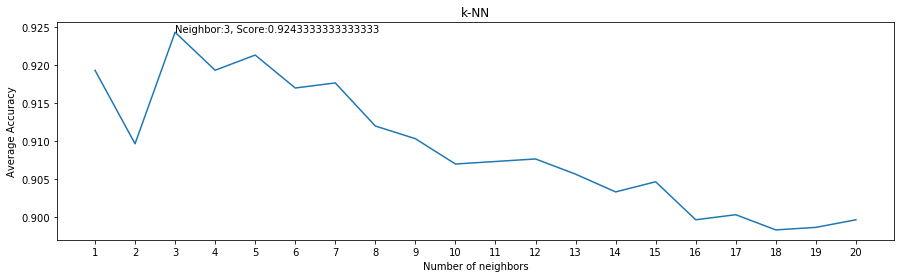

In [74]:
# plot the change in the average accuracy according to k
plt.figure(figsize = (15, 4))
plt.title("k-NN")
plt.xticks(k_neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("Average Accuracy")
results = []
bn, bs = 0, 0
for k in k_neighbors:
    # k-fold cv from scratch for k-NN
    print("start validate", k," neighbors")
    acc = mean(new_new_cross_val_score(X_train_small, y_train_small, distances, cv=y_train_small.shape[0], k=k, p=2))
    results.append(acc)
    print("\nfinished, mean accuracy:",acc)
    if (bs < acc): 
        bn, bs = k, acc
plt.text(bn, bs, f'Neighbor:{bn}, Score:{bs}')
plt.plot(k_neighbors, results)
plt.show()

In [12]:
k_neighbors = np.linspace(1, 20, 20, dtype='int')
n_powers = np.linspace(1,15,15,dtype = 'int')

Start validation: P:1, K:1
Finished, mean accuracy: 91.033%
Start validation: P:1, K:2
Finished, mean accuracy: 89.533%
Start validation: P:1, K:3
Finished, mean accuracy: 90.767%
Start validation: P:1, K:4
Finished, mean accuracy: 90.900%
Start validation: P:1, K:5
Finished, mean accuracy: 90.467%
Start validation: P:1, K:6
Finished, mean accuracy: 90.233%
Start validation: P:1, K:7
Finished, mean accuracy: 90.267%
Start validation: P:1, K:8
Finished, mean accuracy: 90.300%
Start validation: P:1, K:9
Finished, mean accuracy: 90.100%
Start validation: P:1, K:10
Finished, mean accuracy: 89.800%
Start validation: P:1, K:11
Finished, mean accuracy: 89.733%
Start validation: P:1, K:12
Finished, mean accuracy: 89.467%
Start validation: P:1, K:13
Finished, mean accuracy: 89.367%
Start validation: P:1, K:14
Finished, mean accuracy: 89.400%
Start validation: P:1, K:15
Finished, mean accuracy: 89.000%
Start validation: P:1, K:16
Finished, mean accuracy: 89.100%
Start validation: P:1, K:17
Finis

Finished, mean accuracy: 91.700%
Start validation: P:7, K:17
Finished, mean accuracy: 91.267%
Start validation: P:7, K:18
Finished, mean accuracy: 91.433%
Start validation: P:7, K:19
Finished, mean accuracy: 91.500%
Start validation: P:7, K:20
Finished, mean accuracy: 91.200%
Start validation: P:8, K:1
Finished, mean accuracy: 93.067%
Start validation: P:8, K:2
Finished, mean accuracy: 92.167%
Start validation: P:8, K:3
Finished, mean accuracy: 94.100%
Start validation: P:8, K:4
Finished, mean accuracy: 93.167%
Start validation: P:8, K:5
Finished, mean accuracy: 93.333%
Start validation: P:8, K:6
Finished, mean accuracy: 92.667%
Start validation: P:8, K:7
Finished, mean accuracy: 92.800%
Start validation: P:8, K:8
Finished, mean accuracy: 92.533%
Start validation: P:8, K:9
Finished, mean accuracy: 92.500%
Start validation: P:8, K:10
Finished, mean accuracy: 92.733%
Start validation: P:8, K:11
Finished, mean accuracy: 92.533%
Start validation: P:8, K:12
Finished, mean accuracy: 92.367%


Finished, mean accuracy: 92.600%
Start validation: P:14, K:11
Finished, mean accuracy: 92.533%
Start validation: P:14, K:12
Finished, mean accuracy: 92.700%
Start validation: P:14, K:13
Finished, mean accuracy: 92.467%
Start validation: P:14, K:14
Finished, mean accuracy: 92.000%
Start validation: P:14, K:15
Finished, mean accuracy: 91.967%
Start validation: P:14, K:16
Finished, mean accuracy: 91.867%
Start validation: P:14, K:17
Finished, mean accuracy: 91.867%
Start validation: P:14, K:18
Finished, mean accuracy: 91.433%
Start validation: P:14, K:19
Finished, mean accuracy: 91.367%
Start validation: P:14, K:20
Finished, mean accuracy: 91.367%
Start validation: P:15, K:1
Finished, mean accuracy: 92.967%
Start validation: P:15, K:2
Finished, mean accuracy: 91.733%
Start validation: P:15, K:3
Finished, mean accuracy: 93.200%
Start validation: P:15, K:4
Finished, mean accuracy: 93.433%
Start validation: P:15, K:5
Finished, mean accuracy: 93.200%
Start validation: P:15, K:6
Finished, mean

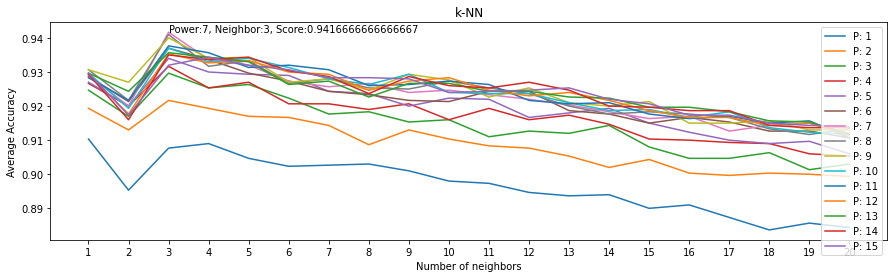

In [413]:
# plot the change in the average accuracy according to k
plt.figure(figsize = (15, 4))
plt.title("k-NN")
plt.xticks(k_neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("Average Accuracy")
bp, bn, bs = 0, 0, 0
for p in n_powers:
    results = []
    distances = distance.pdist(X_train_small, 'minkowski', p)
    distances = distance.squareform(distances)
    for k in k_neighbors:
        print(f'Start validation: P:{p}, K:{k}')
        acc = mean(new_new_cross_val_score(X_train_small, y_train_small, distances, cv=y_train_small.shape[0], k=k, p=2))
        if bs < acc: bp, bn, bs = p, k, acc
        results.append(acc)
        print(f"Finished, mean accuracy: {acc:.3%}")
    plt.plot(k_neighbors, results, label=f'P: {p}')
        
plt.text(bn, bs, f'Power:{bp}, Neighbor:{bn}, Score:{bs}')
plt.legend()
plt.show()

## d.Improve performance of k-NN by data preprocessing

In [57]:
X_train_mm = preprocessing.minmax_scale(X_train_small)
X_test_mm = preprocessing.minmax_scale(X_test_small)

In [58]:
X_train_ma = preprocessing.maxabs_scale(X_train_small)
X_test_ma = preprocessing.maxabs_scale(X_test_small)

In [59]:
X_train_nr = preprocessing.normalize(X_train_small)
X_test_nr = preprocessing.normalize(X_test_small)

In [60]:
X_train_rs = preprocessing.robust_scale(X_train_small,axis=1)
X_test_rs = preprocessing.robust_scale(X_test_small,axis=1)

In [61]:
X_train_unit = preprocessing.binarize(X_train_small)
X_test_unit = preprocessing.binarize(X_test_small)

In [62]:
X_train_s = preprocessing.scale(X_train_small, axis = 1)
X_test_s = preprocessing.scale(X_test_small, axis = 1)

In [152]:
k_neighbors = np.linspace(1, 5, 5, dtype='int')
distances_mm = distance.pdist(X_train_mm, 'minkowski', 2)
distances_mm = distance.squareform(distances_mm)

distances_ma = distance.pdist(X_train_ma, 'minkowski', 2)
distances_ma = distance.squareform(distances_ma)

distances_nr = distance.pdist(X_train_nr, 'minkowski', 2)
distances_nr = distance.squareform(distances_nr)

In [53]:
distances_rs = distance.pdist(X_train_rs, 'minkowski', 2)
distances_rs = distance.squareform(distances_rs)

In [151]:
distances_unit = distance.pdist(X_train_unit, 'minkowski', 2)
distances_unit = distance.squareform(distances_unit)

In [55]:
distances_s = distance.pdist(X_train_s, 'minkowski', 2)
distances_s = distance.squareform(distances_s)

In [56]:
k_neighbors = np.linspace(1, 20, 20, dtype='int')

start validate 1  neighbors
mm finished
start validate 2  neighbors
mm finished
start validate 3  neighbors
mm finished
start validate 4  neighbors
mm finished
start validate 5  neighbors
mm finished
start validate 6  neighbors
mm finished
start validate 7  neighbors
mm finished
start validate 8  neighbors
mm finished
start validate 9  neighbors
mm finished
start validate 10  neighbors
mm finished
start validate 11  neighbors
mm finished
start validate 12  neighbors
mm finished
start validate 13  neighbors
mm finished
start validate 14  neighbors
mm finished
start validate 15  neighbors
mm finished
start validate 16  neighbors
mm finished
start validate 17  neighbors
mm finished
start validate 18  neighbors
mm finished
start validate 19  neighbors
mm finished
start validate 20  neighbors
mm finished


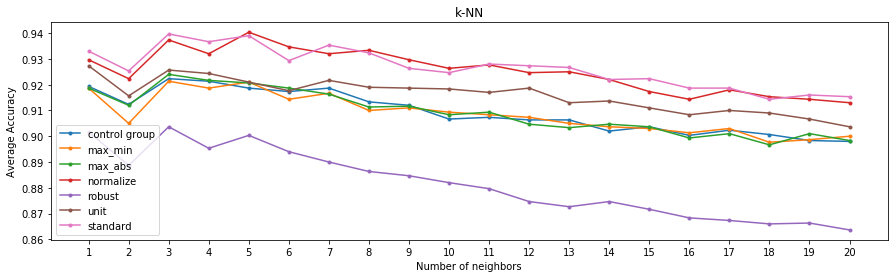

In [63]:
# plot the change in the average accuracy according to k
plt.figure(figsize = (15, 4))
plt.title("k-NN")
plt.xticks(k_neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("Average Accuracy")
knn0 = []
knn1 = []
knn2 = []
knn3 = []
knn4 = []
knn5 = []
knn6 = []

for k in k_neighbors:
    print("start validate", k," neighbors")
    # k-fold cv from scratch for k-NN
    acc0 = mean(new_new_cross_val_score(X_train_small,y_train_small,distances, cv=y_train_small.shape[0], k=k, p=2))
    acc1 = mean(new_new_cross_val_score(X_train_mm,y_train_small,distances_mm, cv=y_train_small.shape[0], k=k, p=2))
    print("mm finished")
    acc2 = mean(new_new_cross_val_score(X_train_ma,y_train_small,distances_ma, cv=y_train_small.shape[0], k=k, p=2))
    acc3 = mean(new_new_cross_val_score(X_train_nr,y_train_small,distances_nr, cv=y_train_small.shape[0], k=k, p=2))
    acc4 = mean(new_new_cross_val_score(X_train_rs,y_train_small,distances_rs, cv=y_train_small.shape[0], k=k, p=2))
    acc5 = mean(new_new_cross_val_score(X_train_unit,y_train_small,distances_unit, cv=y_train_small.shape[0], k=k, p=2))
    acc6 = mean(new_new_cross_val_score(X_train_s,y_train_small,distances_s, cv=y_train_small.shape[0], k=k, p=2))
    knn0.append(acc0)
    knn1.append(acc1)
    knn2.append(acc2)
    knn3.append(acc3)
    knn4.append(acc4)
    knn5.append(acc5)
    knn6.append(acc6)

plt.plot(k_neighbors, knn0, label="control group",marker='.')
plt.plot(k_neighbors, knn1, label="max_min",marker='.')
plt.plot(k_neighbors, knn2, label="max_abs",marker='.')
plt.plot(k_neighbors, knn3, label="normalize",marker='.')
plt.plot(k_neighbors, knn4, label="robust",marker='.')
plt.plot(k_neighbors, knn5, label="unit",marker='.')
plt.plot(k_neighbors, knn6, label="standard",marker='.')
plt.legend()
plt.show()

In [40]:
k_neighbors = np.linspace(1, 20, 20, dtype='int')
n_powers = np.linspace(1,15,15,dtype = 'int')

Start validation: P:1, K:1
Finished, mean accuracy: 93.300%
Start validation: P:1, K:2
Finished, mean accuracy: 92.300%
Start validation: P:1, K:3
Finished, mean accuracy: 93.767%
Start validation: P:1, K:4
Finished, mean accuracy: 93.367%
Start validation: P:1, K:5
Finished, mean accuracy: 93.833%
Start validation: P:1, K:6
Finished, mean accuracy: 93.400%
Start validation: P:1, K:7
Finished, mean accuracy: 93.500%
Start validation: P:1, K:8
Finished, mean accuracy: 92.867%
Start validation: P:1, K:9
Finished, mean accuracy: 92.600%
Start validation: P:1, K:10
Finished, mean accuracy: 92.667%
Start validation: P:1, K:11
Finished, mean accuracy: 92.800%
Start validation: P:1, K:12
Finished, mean accuracy: 92.700%
Start validation: P:1, K:13
Finished, mean accuracy: 92.367%
Start validation: P:1, K:14
Finished, mean accuracy: 92.467%
Start validation: P:1, K:15
Finished, mean accuracy: 92.267%
Start validation: P:1, K:16
Finished, mean accuracy: 91.867%
Start validation: P:1, K:17
Finis

Finished, mean accuracy: 92.033%
Start validation: P:7, K:17
Finished, mean accuracy: 91.700%
Start validation: P:7, K:18
Finished, mean accuracy: 91.367%
Start validation: P:7, K:19
Finished, mean accuracy: 91.400%
Start validation: P:7, K:20
Finished, mean accuracy: 91.367%
Start validation: P:8, K:1
Finished, mean accuracy: 93.300%
Start validation: P:8, K:2
Finished, mean accuracy: 91.800%
Start validation: P:8, K:3
Finished, mean accuracy: 93.633%
Start validation: P:8, K:4
Finished, mean accuracy: 93.700%
Start validation: P:8, K:5
Finished, mean accuracy: 93.667%
Start validation: P:8, K:6
Finished, mean accuracy: 93.167%
Start validation: P:8, K:7
Finished, mean accuracy: 93.567%
Start validation: P:8, K:8
Finished, mean accuracy: 93.000%
Start validation: P:8, K:9
Finished, mean accuracy: 92.600%
Start validation: P:8, K:10
Finished, mean accuracy: 92.800%
Start validation: P:8, K:11
Finished, mean accuracy: 92.767%
Start validation: P:8, K:12
Finished, mean accuracy: 92.800%


Finished, mean accuracy: 92.767%
Start validation: P:14, K:11
Finished, mean accuracy: 92.600%
Start validation: P:14, K:12
Finished, mean accuracy: 92.900%
Start validation: P:14, K:13
Finished, mean accuracy: 92.467%
Start validation: P:14, K:14
Finished, mean accuracy: 92.400%
Start validation: P:14, K:15
Finished, mean accuracy: 92.300%
Start validation: P:14, K:16
Finished, mean accuracy: 92.033%
Start validation: P:14, K:17
Finished, mean accuracy: 91.800%
Start validation: P:14, K:18
Finished, mean accuracy: 91.600%
Start validation: P:14, K:19
Finished, mean accuracy: 91.467%
Start validation: P:14, K:20
Finished, mean accuracy: 91.300%
Start validation: P:15, K:1
Finished, mean accuracy: 93.300%
Start validation: P:15, K:2
Finished, mean accuracy: 92.933%
Start validation: P:15, K:3
Finished, mean accuracy: 93.933%
Start validation: P:15, K:4
Finished, mean accuracy: 93.467%
Start validation: P:15, K:5
Finished, mean accuracy: 93.467%
Start validation: P:15, K:6
Finished, mean

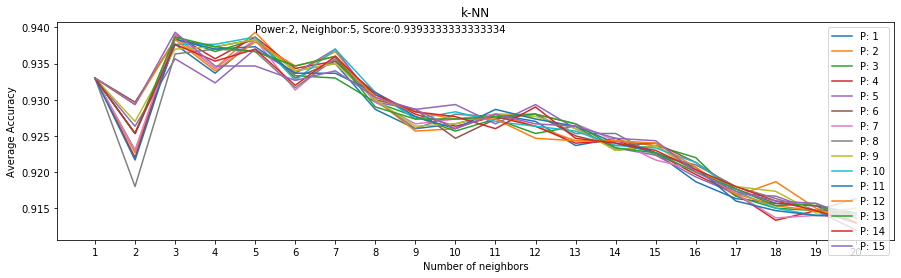

In [41]:
# plot the change in the average accuracy according to k
plt.figure(figsize = (15, 4))
plt.title("k-NN")
plt.xticks(k_neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("Average Accuracy")
bp, bn, bs = 0, 0, 0
for p in n_powers:
    results = []
    distances = distance.pdist(X_train_small, 'minkowski', p)
    distances = distance.squareform(distances)
    for k in k_neighbors:
        print(f'Start validation: P:{p}, K:{k}')
        acc = mean(new_new_cross_val_score(X_train_s, y_train_small, distances_s, cv=y_train_small.shape[0], k=k, p=2))
        if bs < acc: bp, bn, bs = p, k, acc
        results.append(acc)
        print(f"Finished, mean accuracy: {acc:.3%}")
    plt.plot(k_neighbors, results, label=f'P: {p}')
        
plt.text(bn, bs, f'Power:{bp}, Neighbor:{bn}, Score:{bs}')
plt.legend()
plt.show()

## d.Improve performance of k-NN by using another distance metric

### Control group

In [134]:
distances = distance.pdist(X_train_small, 'minkowski', 2)
distances = distance.squareform(distances)

### Normalization/ Standardize + cosine

In [135]:
X_train_nr = preprocessing.normalize(X_train_small)
X_test_nr = preprocessing.normalize(X_test_small)

In [136]:
X_train_s = preprocessing.scale(X_train_small, axis = 1)
X_test_s = preprocessing.scale(X_test_small, axis = 1)

In [137]:
distances_s = distance.pdist(X_train_s, 'minkowski', 2)
distances_s = distance.squareform(distances_s)

In [138]:
distances_cosine_s = distance.pdist(X_train_s, metric='cosine')
distances_cosine_s = distance.squareform(distances_cosine_s)

In [139]:
distances_cosine_nr = distance.pdist(X_train_nr, metric='cosine')
distances_cosine_nr = distance.squareform(distances_cosine_nr)

### Binarize + Hamming + jaccard + dice

In [140]:
distances_jaccard = distance.pdist(X_train_unit, metric='jaccard')
distances_jaccard = distance.squareform(distances_jaccard)

In [141]:
distances_hamming = distance.pdist(X_train_unit, metric='hamming')
distances_hamming = distance.squareform(distances_hamming)

In [142]:
distances_dice = distance.pdist(X_train_unit, metric='dice')
distances_dice = distance.squareform(distances_dice)

### Test result

In [143]:
acc_control = mean(new_new_cross_val_score(X_train_small,y_train_small,distances, cv=y_train_small.shape[0], k=3, p=2))

In [144]:
acc_control_s = mean(new_new_cross_val_score(X_train_s,y_train_small,distances_s, cv=y_train_small.shape[0], k=3, p=2))

In [145]:
acc_cosine_s = mean(new_new_cross_val_score(X_train_s, y_train_small, distances_cosine_s, cv=y_train_small.shape[0], k=3, p=2))

In [146]:
acc_cosine_nr = mean(new_new_cross_val_score(X_train_s, y_train_small, distances_cosine_nr, cv=y_train_small.shape[0], k=3, p=2))

In [147]:
acc_jaccard = mean(new_new_cross_val_score(X_train_unit, y_train_small, distances_jaccard, cv=y_train_small.shape[0], k=3, p=2))

In [148]:
acc_hamming = mean(new_new_cross_val_score(X_train_unit, y_train_small, distances_hamming, cv=y_train_small.shape[0], k=3, p=2))

In [149]:
acc_dice = mean(new_new_cross_val_score(X_train_unit, y_train_small, distances_dice, cv=y_train_small.shape[0], k=3, p=2))

In [150]:
print(acc_control,acc_control_s,acc_cosine_s, acc_cosine_nr,acc_jaccard, acc_hamming,acc_dice)

0.9243333333333333 0.938 0.941 0.937 0.9246666666666666 0.9243333333333333 0.9256666666666666


### Test for different k

In [157]:
k_neighbors = np.linspace(1, 20, 20, dtype='int')

start validate 1  neighbors
start validate 2  neighbors
start validate 3  neighbors
start validate 4  neighbors
start validate 5  neighbors
start validate 6  neighbors
start validate 7  neighbors
start validate 8  neighbors
start validate 9  neighbors
start validate 10  neighbors
start validate 11  neighbors
start validate 12  neighbors
start validate 13  neighbors
start validate 14  neighbors
start validate 15  neighbors
start validate 16  neighbors
start validate 17  neighbors
start validate 18  neighbors
start validate 19  neighbors
start validate 20  neighbors


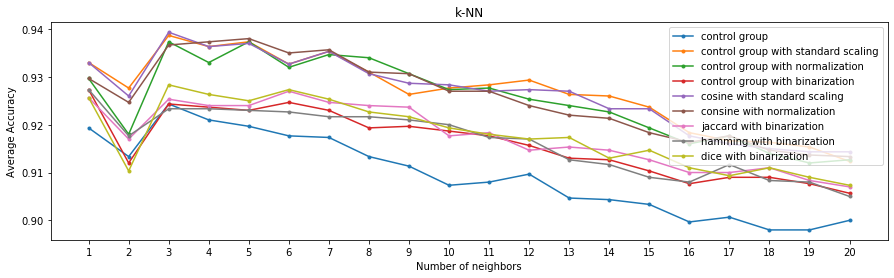

In [158]:
# plot the change in the average accuracy according to k
plt.figure(figsize = (15, 4))
plt.title("k-NN")
plt.xticks(k_neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("Average Accuracy")
knn0 = []
knn1 = []
knn2 = []
knn3 = []
knn4 = []
knn5 = []
knn6 = []
knn7 = []
knn8 = []

for k in k_neighbors:
    print("start validate", k," neighbors")
    # k-fold cv from scratch for k-NN
    acc_control = mean(new_new_cross_val_score(X_train_small,y_train_small,distances, cv=y_train_small.shape[0], k=k, p=2))    
    acc_control_s = mean(new_new_cross_val_score(X_train_s,y_train_small,distances_s, cv=y_train_small.shape[0], k=k, p=2))
    acc_control_nr = mean(new_new_cross_val_score(X_train_nr,y_train_small,distances_nr, cv=y_train_small.shape[0], k=k, p=2))    
    acc_control_unit = mean(new_new_cross_val_score(X_train_unit,y_train_small,distances_unit, cv=y_train_small.shape[0], k=k, p=2))    
    acc_cosine_s = mean(new_new_cross_val_score(X_train_s, y_train_small, distances_cosine_s, cv=y_train_small.shape[0], k=k, p=2))
    acc_cosine_nr = mean(new_new_cross_val_score(X_train_s, y_train_small, distances_cosine_nr, cv=y_train_small.shape[0], k=k, p=2))
    acc_jaccard = mean(new_new_cross_val_score(X_train_unit, y_train_small, distances_jaccard, cv=y_train_small.shape[0], k=k, p=2))
    acc_hamming = mean(new_new_cross_val_score(X_train_unit, y_train_small, distances_hamming, cv=y_train_small.shape[0], k=k, p=2))
    acc_dice = mean(new_new_cross_val_score(X_train_unit, y_train_small, distances_dice, cv=y_train_small.shape[0], k=k, p=2))
    
    knn0.append(acc_control)
    knn1.append(acc_control_s)
    knn2.append(acc_control_nr)
    knn3.append(acc_control_unit)
    
    knn4.append(acc_cosine_s)
    knn5.append(acc_cosine_nr)
    knn6.append(acc_jaccard)
    knn7.append(acc_hamming)
    knn8.append(acc_dice)

plt.plot(k_neighbors, knn0, label="control group",marker='.')
plt.plot(k_neighbors, knn1, label="control group with standard scaling",marker='.')
plt.plot(k_neighbors, knn2, label="control group with normalization",marker='.')
plt.plot(k_neighbors, knn3, label="control group with binarization",marker='.')
plt.plot(k_neighbors, knn4, label="cosine with standard scaling",marker='.')
plt.plot(k_neighbors, knn5, label="consine with normalization",marker='.')
plt.plot(k_neighbors, knn6, label="jaccard with binarization",marker='.')
plt.plot(k_neighbors, knn7, label="hamming with binarization",marker='.')
plt.plot(k_neighbors, knn8, label="dice with binarization",marker='.')

plt.legend()
plt.show()

## Load data for part E.F.G

In [10]:
distances_cosine = ddddistance.pdist(X_train_small, metric='cosine')
distances_cosine = distance.squareform(distances_cosine)

In [3]:
train = np.genfromtxt(
        'datasets/MNIST_train.csv', delimiter=',')

In [4]:
test = np.genfromtxt('datasets/MNIST_test.csv', delimiter = ',')

In [14]:
X_train, y_train = train[:,1:], train[:,0]

In [15]:
X_test, y_test = test[:,1:], test[:,0]

## E: Hyperparameter Optimization on Large Training Data

In [79]:
def leave_one_out(X, y, p):
    n_samples = y.shape[0]
    indices = np.arange(n_samples)
    
    batch_numbers = 200
    batch_validation_idx = np.array_split(indices, batch_numbers)
    
    # cumulated_loss for k in range [1,20]
    cumulated_loss = [0 for i in range(20)]
    accuracy = [0 for i in range(20)]
    
    for u in range(batch_numbers):
        print(f"start {u} batch")
        validation_idx = batch_validation_idx[u]
        pdist = distance.cdist(X[validation_idx], X,'minkowski',2) 
        y_indices = np.argsort(pdist) #shape: batch_size(3000)*sample_numbers(60,000)
        del pdist
        gc.collect()
        
        for k in range(20):
            k_closests = y[y_indices[:,1:k+2]] #shape: batch_size*k

            # random selection with bincount
            # input: k_closest with shape (batch_size,k)
            # output: y_pred with shape (batch_size,)

            # shape: (batch_size,10)
            bincount = np.array([np.count_nonzero(k_closests == j, axis = 1) for j in range(10)]).transpose()

            max_bin_values = np.amax(bincount,axis=1)
            a = np.array([bincount[j] == max_bin_values[j] for j in range(max_bin_values.shape[0])])
            y_pred = np.array([])
            for row in a:
                tmp = np.asarray(np.nonzero(row)).reshape(-1)
                y_pred = np.append(y_pred,np.random.choice(tmp,1,replace=False))

            cumulated_loss[k] += np.sum(y_pred == y[validation_idx])
    
    for k in range(20):
        accuracy[k] = cumulated_loss[k] / n_samples
    
    return accuracy

In [80]:
X_train_s = preprocessing.scale(X_train,axis=1)
X_test_s = preprocessing.scale(X_test,axis=1)

In [83]:
results = leave_one_out(X_train_s,y_train,2)
empirical_losses = [1-x for x in results]

start 0 batch
start 1 batch
start 2 batch
start 3 batch
start 4 batch
start 5 batch
start 6 batch
start 7 batch
start 8 batch
start 9 batch
start 10 batch
start 11 batch
start 12 batch
start 13 batch
start 14 batch
start 15 batch
start 16 batch
start 17 batch
start 18 batch
start 19 batch
start 20 batch
start 21 batch
start 22 batch
start 23 batch
start 24 batch
start 25 batch
start 26 batch
start 27 batch
start 28 batch
start 29 batch
start 30 batch
start 31 batch
start 32 batch
start 33 batch
start 34 batch
start 35 batch
start 36 batch
start 37 batch
start 38 batch
start 39 batch
start 40 batch
start 41 batch
start 42 batch
start 43 batch
start 44 batch
start 45 batch
start 46 batch
start 47 batch
start 48 batch
start 49 batch
start 50 batch
start 51 batch
start 52 batch
start 53 batch
start 54 batch
start 55 batch
start 56 batch
start 57 batch
start 58 batch
start 59 batch
start 60 batch
start 61 batch
start 62 batch
start 63 batch
start 64 batch
start 65 batch
start 66 batch
start

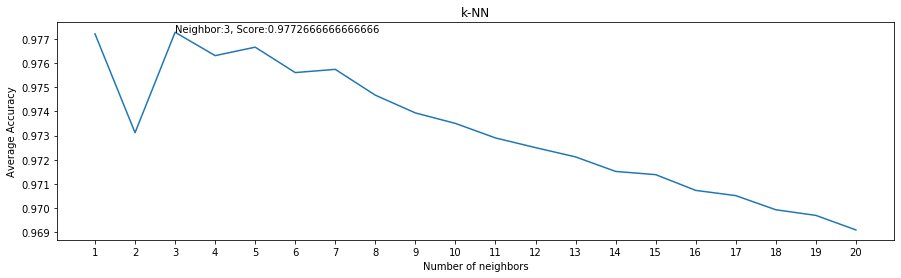

In [112]:
k_neighbors = np.linspace(1,20,20)
plt.figure(figsize = (15, 4))
plt.title("k-NN")
plt.xticks(k_neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("Average Accuracy")
plt.plot(k_neighbors,results)
plt.text(results.index(max(results))+1, max(results), f'Neighbor:{results.index(max(results))+1}, Score:{max(results)}')
plt.show()



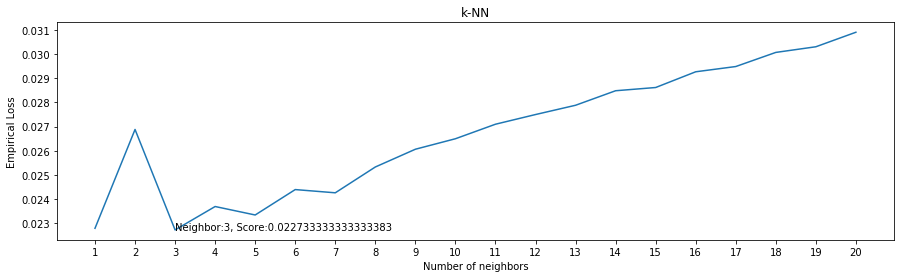

In [117]:
k_neighbors = np.linspace(1,20,20)
plt.figure(figsize = (15, 4))
plt.title("k-NN")
plt.xticks(k_neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("Empirical Loss")
plt.plot(k_neighbors,empirical_losses)
plt.text(empirical_losses.index(min(empirical_losses))+1, min(empirical_losses), f'Neighbor:{empirical_losses.index(min(empirical_losses))+1}, Score:{min(empirical_losses)}')
plt.show()

## F: Forecasting

In [10]:
def evaluation(X_train,y_train,X_test, y_test, k, p):
    n_test_samples = y_test.shape[0] #number of test samples
    indices = np.arange(n_test_samples)
    batch_numbers = 10
    batch_validation_idx = np.array_split(indices, batch_numbers)
    loss = 0
    for u in range(batch_numbers):
        print(f"start{u}batch")
        validation_idx = batch_validation_idx[u]
        pdist = distance.cdist(X_test[validation_idx], X_train,'minkowski',p) 
        y_indices = np.argsort(pdist) #shape: batch_size(3000)*sample_numbers(60,000)
        del pdist
        gc.collect()
        
        k_closests = y_train[y_indices[:,1:k+2]] #shape: batch_size*k
        bincount = np.array([np.count_nonzero(k_closests == j, axis = 1) for j in range(10)]).transpose()
        max_bin_values = np.amax(bincount,axis=1)
        a = np.array([bincount[j] == max_bin_values[j] for j in range(max_bin_values.shape[0])])
        y_pred = np.array([])
        for row in a:
            tmp = np.asarray(np.nonzero(row)).reshape(-1)
            y_pred = np.append(y_pred,np.random.choice(tmp,1,replace=False))
        
        loss += np.sum(y_pred == y_test[validation_idx])
        
    accuracy = loss/n_test_samples
    return accuracy

In [86]:
acc2 = evaluation(X_train_s,y_train,X_test_s,y_test,3,2)
print(acc2)

start0batch
start1batch
start2batch
start3batch
start4batch
start5batch
start6batch
start7batch
start8batch
start9batch
0.9703


## G: Principal Component

In [33]:
X_train_s = preprocessing.scale(X_train_small,axis=1)
X_test_s = preprocessing.scale(X_test_small,axis=1)

In [34]:
pca = PCA(n_components=784)
tmp_pca = pca.fit_transform(X_train_s)

In [35]:
singulars= pca.singular_values_

In [36]:
for d in range(784):
    if np.sum(singulars[:d])/np.sum(singulars[:]) >= 0.95:
        print(f" the min d is {d}")
        break

print("finished")

 the min d is 410
finished


In [37]:
def leave_one_out2(X, y, k, p, pdist):
    n_samples = y.shape[0]
    indices = np.arange(n_samples)
    np.random.RandomState(123).shuffle(indices)
    count = 0
    for i in range(n_samples):
        y_index = np.argsort(pdist[i])
        k_closests = y[y_index[1:k+1]].astype(int)
        if np.argmax(np.bincount(k_closests)) == y[i]: count += 1 
    return count / n_samples

In [38]:
d_space = np.linspace(1,200,200).astype(int)

In [39]:
accuracies = []
for d in d_space:
    print(f"start test {d}")
    pca = PCA(n_components=d)
    X_train_pca = pca.fit_transform(X_train_s)
    distances = distance.pdist(X_train_pca, 'minkowski', 2)
    distances = distance.squareform(distances)
    accuracies.append(leave_one_out2(X_train_pca,y_train_small,3,2,distances))

start test 1
start test 2
start test 3
start test 4
start test 5
start test 6
start test 7
start test 8
start test 9
start test 10
start test 11
start test 12
start test 13
start test 14
start test 15
start test 16
start test 17
start test 18
start test 19
start test 20
start test 21
start test 22
start test 23
start test 24
start test 25
start test 26
start test 27
start test 28
start test 29
start test 30
start test 31
start test 32
start test 33
start test 34
start test 35
start test 36
start test 37
start test 38
start test 39
start test 40
start test 41
start test 42
start test 43
start test 44
start test 45
start test 46
start test 47
start test 48
start test 49
start test 50
start test 51
start test 52
start test 53
start test 54
start test 55
start test 56
start test 57
start test 58
start test 59
start test 60
start test 61
start test 62
start test 63
start test 64
start test 65
start test 66
start test 67
start test 68
start test 69
start test 70
start test 71
start test 72
s

In [40]:
bs = d_space[np.argmax(accuracies)]
bn = np.max(accuracies)
print(f"{bs,bn}")

(35, 0.9463333333333334)


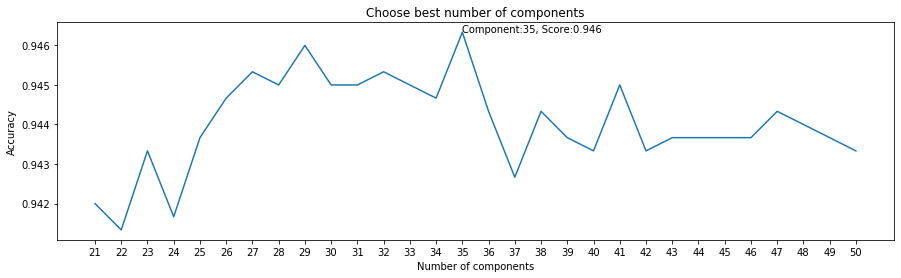

In [41]:
bc = d_space[np.argmax(accuracies)]
bn = np.max(accuracies)
plt.figure(figsize = (15, 4))
plt.title("Choose best number of components")
plt.xlabel("Number of components")
plt.ylabel("Accuracy")
plt.xticks(d_space[20:50])
plt.plot(d_space[20:50],accuracies[20:50])
plt.text(bc,bn, f'Component:{bc}, Score:{bn:.3f}')
plt.show()

### Test on large data set with 30 principal components

In [16]:
X_train_s = preprocessing.scale(X_train,axis=1)
X_test_s = preprocessing.scale(X_test,axis=1)

In [17]:
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_s)
X_test_pca = pca.transform(X_test_s)

In [19]:
acc3 = evaluation(X_train_pca,y_train,X_test_pca,y_test,3,2)

start0batch
start1batch
start2batch
start3batch
start4batch
start5batch
start6batch
start7batch
start8batch
start9batch


In [20]:
print(acc3)

0.9756
